In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Δοσμένα Δεδομένα

In [2]:
repair_shop = [500, 1550, 1250, 1300, 750, 1000, 1250, 1300, 800, 2500]
expert = [400, 1500, 1300, 1300, 800, 800, 1000, 1100, 650, 2200]
delta = [x - y for x, y in zip(repair_shop, expert)]

In [3]:
data = np.array([ [i for i in range(1,11)], delta])
df = pd.DataFrame(data, index=['car_number', 'difference']).T
n = len(df) # sample size = 10
df.head()

,car_number,difference
0,1,100
1,2,50
2,3,-50
3,4,0
4,5,-50


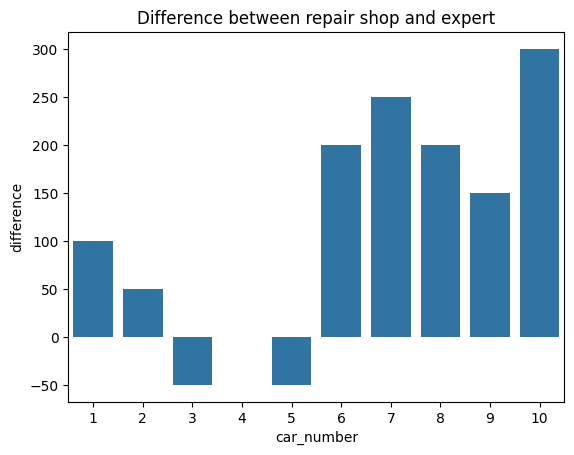

In [4]:
sns.barplot(x='car_number', y='difference', data=df, )
plt.title('Difference between repair shop and expert')
plt.show()

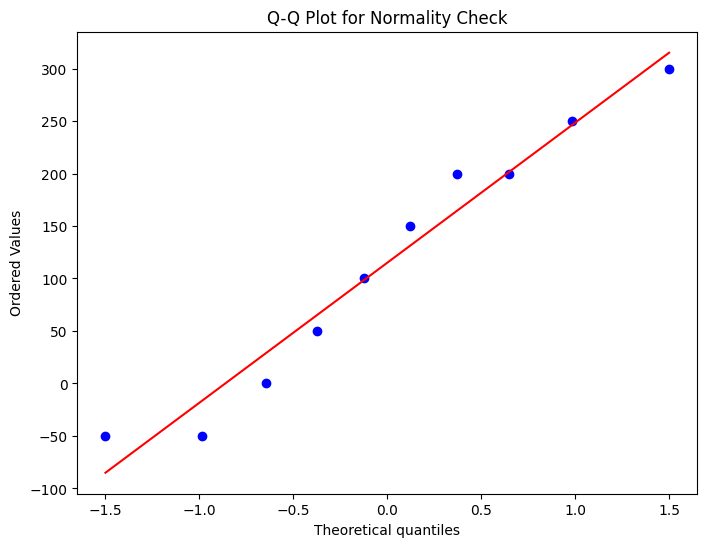

In [5]:
# Creating a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df['difference'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.show()

#### (null hypothesis) Η0: μ=0 | Δεν υπάρχει υπερεκτίμηση ζημιών από το συνεργείο. 
- Δηλ. Mean(εκτίμηση συνεργείου - εκτίμηση εμπειρογνώμονα) = 0 <=> Mean(εκτίμηση συνεργείου) = Mean(εκτίμηση εμπειρογνώμονα)

#### (alternative hypothesis) H1: μ > 0 (αφού η υπολογισμένη διαφορά είναι συνεργείο - εμπειρογνώμονας) | Το συνεργείο υπερεκτιμά τις ζημιές.
- Δηλ. Mean(εκτίμηση συνεργείου - εκτίμηση εμπειρογνώμονα) > 0 => Mean(εκτίμηση συνεργείου) > Mean(εκτίμηση εμπειρογνώμονα)

In [30]:
delta_mean = df['difference'].mean()
delta_mean

115.0

#### Τυπική Απόκλιση της διαφοράς

In [31]:
delta_std = df['difference'].std(ddof=1) # ddof=1 for sample std
delta_std

124.8332220738267

In [36]:
t_stat, p_value = stats.ttest_1samp(df['difference'], 0, alternative = 'greater')

#### T-statistic (σε απόλυτη τιμή)

In [37]:
abs(t_stat)

2.9131822833531684

#### P-value

In [38]:
p_value

0.008610910984738962

- Αφού το p-value είναι πολύ μικρότερη από 0.05 (0.008610910984738962 < 0.05), παρατηρούμε ότι υπάρχει στατιστικά σημαντική διαφορά μεταξύ των εκτιμήσεων του συνεργείου και των εκτιμήσεων του εμπειρογνώμονα σε επίπεδο σημαντικότητας 5%. Άρα απορρίπτουμε τη μηδενική υπόθεση.

- Επομένως συμπεραίνουμε ότι υπάρχει υπερεκτίμηση των ζημιών από το συνεργείο.